In [1]:
import igraph as ig
import itertools as it

import pickle
from pathlib import Path

# Graph

In [2]:
g = ig.read('../datasets/synthetic_2/graph.picklez')

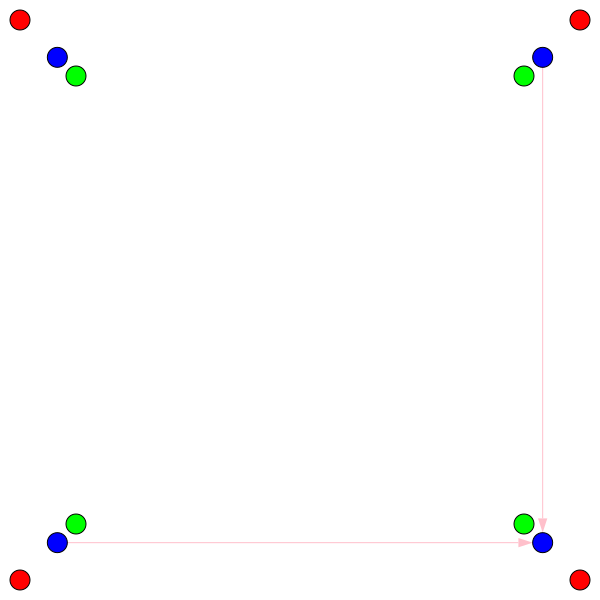

In [3]:
ig.plot(g.subgraph_edges([49,50], delete_vertices=False))

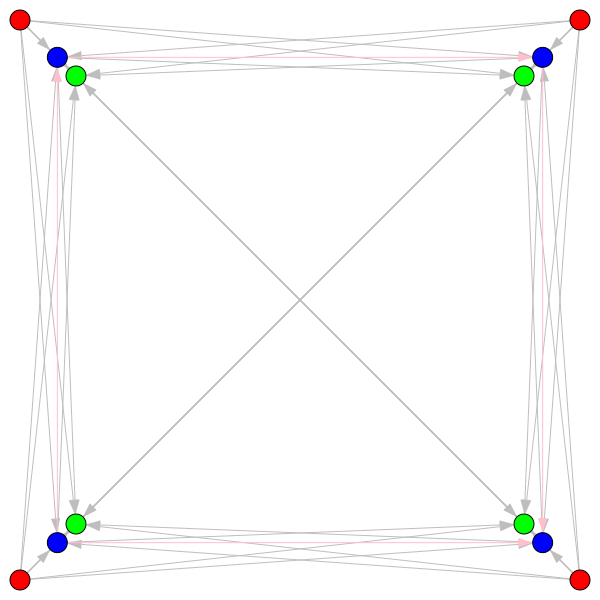

In [4]:
# fig, ax = plt.subplots(figsize=(5,5))
ig.plot(g)  # target='plots/synthetic_graphs/synthetic_graph_5.svg'

In [5]:
g.es['active'] = 1

In [6]:
g.write_picklez('../datasets/synthetic_5/graph.picklez')

# Reward

In [7]:
edge_set = [e.index for e in g.es.select(type_ne='walk')]
possible_configurations = []

for i in range(len(edge_set) + 1):
    possible_configurations.extend(list(it.combinations(edge_set, i)))

print("List of all possible configurations of the graph:", possible_configurations)

List of all possible configurations of the graph: [(), (48,), (49,), (50,), (51,), (48, 49), (48, 50), (48, 51), (49, 50), (49, 51), (50, 51), (48, 49, 50), (48, 49, 51), (48, 50, 51), (49, 50, 51), (48, 49, 50, 51)]


In [8]:
rewards = {
    (): 50,
    (48,): 50,             # blue
    (49,): 0,              # green
    (50,): 0,              # purple
    (51,): 0,              # orange
    (48, 49): 50,          # blue, green
    (48, 50): 0,           # blue, purple
    (48, 51): 0,           # blue, orange
    (49, 50): 100,         # green, purple
    (49, 51): 0,           # green, orange
    (50, 51): 50,          # purple, orange
    (48, 49, 50): 0,       # blue, green, purple
    (48, 49, 51): 50,      # blue, green, orange
    (48, 50, 51): 0,       # blue, purple, orange
    (49, 50, 51): 0,       # green, purple, orange
    (48, 49, 50, 51): 50,  # blue, green, purple, orange
}

In [9]:
pickle.dump(rewards, open(Path("../datasets/synthetic_5/reward_dict.pkl"), "wb"))